In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Data imports

In [ ]:
# read data for cMedupi
data_for_model = pd.read_csv(r'C:\Users\Shivm\Documents\Masters\Research Project\Eskom air quality data\Eskom Model\PM10 Models\Combined Station Data.csv')
#data_for_model.drop(columns=['anomaly'], inplace=True)
data_for_model = data_for_model[data_for_model['Location_Medupi']==True]
data_for_model['NO1'] = data_for_model['NO1'].fillna(data_for_model['NOX'] - data_for_model['NO2'])

data_for_model

,Date,Wind,SO2,NO2,NOX,PM10,wind_x,wind_y,PM2.5,Pressure,Temp,NO1,Date Time,Hour,Month,DayOfWeek,Wind_lag1,SO2_lag1,NO2_lag1,NOX_lag1,PM10_lag1,wind_x_lag1,wind_y_lag1,PM2.5_lag1,Pressure_lag1,Temp_lag1,NO1_lag1,Wind_roll3_mean,Wind_roll3_std,Wind_roll6_mean,Wind_roll6_std,Wind_roll12_mean,Wind_roll12_std,Wind_roll24_mean,Wind_roll24_std,SO2_roll3_mean,SO2_roll3_std,SO2_roll6_mean,SO2_roll6_std,SO2_roll12_mean,SO2_roll12_std,SO2_roll24_mean,SO2_roll24_std,NO2_roll3_mean,NO2_roll3_std,NO2_roll6_mean,NO2_roll6_std,NO2_roll12_mean,NO2_roll12_std,NO2_roll24_mean,NO2_roll24_std,NOX_roll3_mean,NOX_roll3_std,NOX_roll6_mean,NOX_roll6_std,NOX_roll12_mean,NOX_roll12_std,NOX_roll24_mean,NOX_roll24_std,PM10_roll3_mean,PM10_roll3_std,PM10_roll6_mean,PM10_roll6_std,PM10_roll12_mean,PM10_roll12_std,PM10_roll24_mean,PM10_roll24_std,wind_x_roll3_mean,wind_x_roll3_std,wind_x_roll6_mean,wind_x_roll6_std,wind_x_roll12_mean,wind_x_roll12_std,wind_x_roll24_mean,wind_x_roll24_std,wind_y_roll3_mean,wind_y_roll3_std,wind_y_roll6_mean,wind_y_roll6_std,wind_y_roll12_mean,wind_y_roll12_std,wind_y_roll24_mean,wind_y_roll24_std,PM2.5_roll3_mean,PM2.5_roll3_std,PM2.5_roll6_mean,PM2.5_roll6_std,PM2.5_roll12_mean,PM2.5_roll12_std,PM2.5_roll24_mean,PM2.5_roll24_std,Pressure_roll3_mean,Pressure_roll3_std,Pressure_roll6_mean,Pressure_roll6_std,Pressure_roll12_mean,Pressure_roll12_std,Pressure_roll24_mean,Pressure_roll24_std,Temp_roll3_mean,Temp_roll3_std,Temp_roll6_mean,Temp_roll6_std,Temp_roll12_mean,Temp_roll12_std,Temp_roll24_mean,Temp_roll24_std,NO1_roll3_mean,NO1_roll3_std,NO1_roll6_mean,NO1_roll6_std,NO1_roll12_mean,NO1_roll12_std,NO1_roll24_mean,NO1_roll24_std,Location_Chicken Farm,Location_Marapong,Location_Medupi,Location_Phola,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayType_Weekday,DayType_Weekend
0,2017/01/01 00:00:00,0.856357,8.090,2.333,2.039,15.320,0.476509,0.711538,7.511,916.0,NaN,NaN,2017-01-01 00:00:00,0,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.856357,NaN,0.856357,NaN,0.856357,NaN,0.856357,NaN,8.090000,NaN,8.090000,NaN,8.090000,NaN,8.090000,NaN,2.333000,NaN,2.333000,NaN,2.333000,NaN,2.333000,NaN,2.039000,NaN,2.039000,NaN,2.039000,NaN,2.039000,NaN,15.320000,NaN,15.320000,NaN,15.320000,NaN,15.320000,NaN,0.476509,NaN,0.476509,NaN,0.476509,NaN,0.476509,NaN,0.711538,NaN,0.711538,NaN,0.711538,NaN,0.711538,NaN,7.511000,NaN,7.511000,NaN,7.511000,NaN,7.511000,NaN,916.0,NaN,916.0,NaN,916.000000,NaN,916.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,True,False,False,True
1,2017/01/01 00:10:00,0.958277,5.833,2.129,1.733,18.580,0.497338,0.819114,7.715,916.0,NaN,NaN,2017-01-01 00:10:00,0,1,6,0.856357,8.090,2.333,2.039,15.320,0.476509,0.711538,7.511,916.0,NaN,NaN,0.907317,0.072068,0.907317,0.072068,0.907317,0.072068,0.907317,0.072068,6.961500,1.595940,6.961500,1.595940,6.961500,1.595940,6.961500,1.595940,2.231000,0.144250,2.231000,0.144250,2.231000,0.144250,2.231000,0.144250,1.886000,0.216375,1.886000,0.216375,1.886000,0.216375,1.886000,0.216375,16.950000,2.305168,16.950000,2.305168,16.950000,2.305168,16.950000,2.305168,0.486924,0.014729,0.486924,0.014729,0.486924,0.014729,0.486924,0.014729,0.765326,0.076068,0.765326,0.076068,0.765326,0.076068,0.765326,0.076068,7.613000,0.144250,7.613000,0.144250,7.613000,0.144250,7.613000,0.144250,916.0,0.0,916.0,0.0,916.000000,0.000000,916.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,True,False,False,True
2,2017/01/01 00:20:00,0.966117,6.037,2.299,2.005,23.160,0.446315,0.856846,11.310,916.0,NaN,NaN,2017-01-01 00:20:00,0,1,6,0.958277,5.833,2.129,1.733,18.580,0.497338,0.819114,7.715,916.0,NaN,NaN,0.926917,0.061232,0.926917,0.061232,0.926917,0.061232,0.926917,0.061232,6.653333,1.248364,6.653333,1.248364,6.653333,1.248364,6.653333,1.248364,2.253667,0.109295,2.253667,0.109295,2.253667,0.109295,2.253667,0.109295,1.925667,0.167718,1.925667,0.167718,1.925667,0.167718,1.925667,0

In [3]:
#null checks
data_for_model.isna().sum()

Date                  0
Wind                691
SO2                 250
NO2                4456
NOX                4458
                   ... 
Season_Spring         0
Season_Summer         0
Season_Winter         0
DayType_Weekday       0
DayType_Weekend       0
Length: 125, dtype: int64

In [4]:
data_for_model['Date Time'] = pd.to_datetime(data_for_model['Date Time'])
data_for_model['Year'] = data_for_model['Date Time'].dt.year
data_for_model.drop(columns=['Date', 'Date Time'], inplace=True)


In [5]:
data_for_model.columns

Index(['Wind', 'SO2', 'NO2', 'NOX', 'PM10', 'wind_x', 'wind_y', 'PM2.5',
       'Pressure', 'Temp',
       ...
       'Location_Marapong', 'Location_Medupi', 'Location_Phola',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'DayType_Weekday', 'DayType_Weekend', 'Year'],
      dtype='object', length=124)

## Create Target variable and rolling features

In [ ]:
data_for_model['PM2.5_lag1'] = data_for_model['PM2.5'].shift(1)
data_for_model['PM2.5_lag2'] = data_for_model['PM2.5'].shift(2)
data_for_model['PM2.5_lag3'] = data_for_model['PM2.5'].shift(3)
data_for_model['PM2.5_t+3'] = data_for_model['PM2.5'].shift(-3)
#data_for_model['PM2.5_t+6'] = data_for_model['PM2.5'].shift(-6)
#data_for_model['PM2.5_t+12'] = data_for_model['PM2.5'].shift(-12)


# Rolling means with different windows, shifted by 1 to prevent leakage
# data_for_model['PM2.5_roll3_mean'] = data_for_model['PM2.5'].rolling(window=3).mean().shift(1)
# data_for_model['PM2.5_roll6_mean'] = data_for_model['PM2.5'].rolling(window=6).mean().shift(1)
# data_for_model['PM2.5_roll12_mean'] = data_for_model['PM2.5'].rolling(window=12).mean().shift(1)
# data_for_model['PM2.5_roll24_mean'] = data_for_model['PM2.5'].rolling(window=24).mean().shift(1)
# data_for_model['PM2.5_roll3_std'] = data_for_model['PM2.5'].rolling(3).std().shift(1)
# data_for_model['PM2.5_roll6_std'] = data_for_model['PM2.5'].rolling(6).std().shift(1)
# data_for_model['PM2.5_roll12_std'] = data_for_model['PM2.5'].rolling(12).std().shift(1)
# data_for_model['PM2.5_roll24_std'] = data_for_model['PM2.5'].rolling(24).std().shift(1)
data_for_model['PM2.5_diff1'] = data_for_model['PM2.5'] - data_for_model['PM2.5'].shift(1)
#data_for_model['Temp_diff1'] = data_for_model['Temp'] - data_for_model['Temp'].shift(1)

data_for_model = data_for_model.drop(columns=[col for col in data_for_model.columns if 'Temp' in col or 'NO1' in col])

data_for_model = data_for_model.dropna().reset_index(drop=True)
# # # Split by year
df_train = data_for_model[data_for_model['Year'] == 2015]
df_test = data_for_model[data_for_model['Year'] == 2016]
df_val = data_for_model[data_for_model['Year'] == 2017]


In [7]:
data_for_model.isna().sum()

Wind               0
SO2                0
NO2                0
NOX                0
PM10               0
                  ..
DayType_Weekday    0
DayType_Weekend    0
Year               0
PM2.5_t+3          0
PM2.5_diff1        0
Length: 106, dtype: int64

In [8]:
data_for_model

,Wind,SO2,NO2,NOX,PM10,wind_x,wind_y,PM2.5,Pressure,Hour,Month,DayOfWeek,Wind_lag1,SO2_lag1,NO2_lag1,NOX_lag1,PM10_lag1,wind_x_lag1,wind_y_lag1,PM2.5_lag1,Pressure_lag1,Wind_roll3_mean,Wind_roll3_std,Wind_roll6_mean,Wind_roll6_std,Wind_roll12_mean,Wind_roll12_std,Wind_roll24_mean,Wind_roll24_std,SO2_roll3_mean,SO2_roll3_std,SO2_roll6_mean,SO2_roll6_std,SO2_roll12_mean,SO2_roll12_std,SO2_roll24_mean,SO2_roll24_std,NO2_roll3_mean,NO2_roll3_std,NO2_roll6_mean,NO2_roll6_std,NO2_roll12_mean,NO2_roll12_std,NO2_roll24_mean,NO2_roll24_std,NOX_roll3_mean,NOX_roll3_std,NOX_roll6_mean,NOX_roll6_std,NOX_roll12_mean,NOX_roll12_std,NOX_roll24_mean,NOX_roll24_std,PM10_roll3_mean,PM10_roll3_std,PM10_roll6_mean,PM10_roll6_std,PM10_roll12_mean,PM10_roll12_std,PM10_roll24_mean,PM10_roll24_std,wind_x_roll3_mean,wind_x_roll3_std,wind_x_roll6_mean,wind_x_roll6_std,wind_x_roll12_mean,wind_x_roll12_std,wind_x_roll24_mean,wind_x_roll24_std,wind_y_roll3_mean,wind_y_roll3_std,wind_y_roll6_mean,wind_y_roll6_std,wind_y_roll12_mean,wind_y_roll12_std,wind_y_roll24_mean,wind_y_roll24_std,PM2.5_roll3_mean,PM2.5_roll3_std,PM2.5_roll6_mean,PM2.5_roll6_std,PM2.5_roll12_mean,PM2.5_roll12_std,PM2.5_roll24_mean,PM2.5_roll24_std,Pressure_roll3_mean,Pressure_roll3_std,Pressure_roll6_mean,Pressure_roll6_std,Pressure_roll12_mean,Pressure_roll12_std,Pressure_roll24_mean,Pressure_roll24_std,Location_Chicken Farm,Location_Marapong,Location_Medupi,Location_Phola,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayType_Weekday,DayType_Weekend,Year,PM2.5_t+3,PM2.5_diff1
0,0.958277,5.833,2.129,1.733,18.580,0.497338,0.819114,7.715,916.0,0,1,6,0.856357,8.090,2.333,2.039,15.320,0.476509,0.711538,7.511,916.0,0.907317,0.072068,0.907317,0.072068,0.907317,0.072068,0.907317,0.072068,6.961500,1.595940,6.961500,1.595940,6.961500,1.595940,6.961500,1.595940,2.231000,0.144250,2.231000,0.144250,2.231000,0.144250,2.231000,0.144250,1.886000,0.216375,1.886000,0.216375,1.886000,0.216375,1.886000,0.216375,16.950000,2.305168,16.950000,2.305168,16.950000,2.305168,16.950000,2.305168,0.486924,0.014729,0.486924,0.014729,0.486924,0.014729,0.486924,0.014729,0.765326,0.076068,0.765326,0.076068,0.765326,0.076068,0.765326,0.076068,7.613000,0.144250,7.613000,0.144250,7.613000,0.144250,7.613000,0.144250,916.0,0.0,916.0,0.0,916.000000,0.000000,916.000000,0.000000,False,False,True,False,False,False,True,False,False,True,2017,19.650,0.204
1,0.966117,6.037,2.299,2.005,23.160,0.446315,0.856846,11.310,916.0,0,1,6,0.958277,5.833,2.129,1.733,18.580,0.497338,0.819114,7.715,916.0,0.926917,0.061232,0.926917,0.061232,0.926917,0.061232,0.926917,0.061232,6.653333,1.248364,6.653333,1.248364,6.653333,1.248364,6.653333,1.248364,2.253667,0.109295,2.253667,0.109295,2.253667,0.109295,2.253667,0.109295,1.925667,0.167718,1.925667,0.167718,1.925667,0.167718,1.925667,0.167718,19.020000,3.938477,19.020000,3.938477,19.020000,3.938477,19.020000,3.938477,0.473387,0.025655,0.473387,0.025655,0.473387,0.025655,0.473387,0.025655,0.795833,0.075400,0.795833,0.075400,0.795833,0.075400,0.795833,0.075400,8.845333,2.136900,8.845333,2.136900,8.845333,2.136900,8.845333,2.136900,916.0,0.0,916.0,0.0,916.000000,0.000000,916.000000,0.000000,False,False,True,False,False,False,True,False,False,True,2017,16.370,3.595
2,1.143823,3.432,2.220,1.858,22.930,0.485885,1.035494,15.700,916.0,0,1,6,0.966117,6.037,2.299,2.005,23.160,0.446315,0.856846,11.310,916.0,1.022739,0.104935,0.981143,0.119422,0.981143,0.119422,0.981143,0.119422,5.100667,1.448703,5.848000,1.906093,5.848000,1.906093,5.848000,1.906093,2.216000,0.085071,2.245250,0.090813,2.245250,0.090813,2.245250,0.090813,1.865333,0.136148,1.908750,0.141059,1.908750,0.141059,1.908750,0.141059,21.556667,2.580433,19.997500,3.763388,19.997500,3.763388,19.997500,3.763388,0.476513,0.026772,0.476512,0.021859,0.476512,0.021859,0.476512,0.021859,0.903818,0.115584,0.855748,0.134720,0.855748,0.134720,0.855748,0.134720,11.575000,3.999091,10.559000,3.845886,10.559000,3.845886,10.559000,3.845886,916.0,0.0,916.0,0.0,

## Correlation Matrix to identify best features

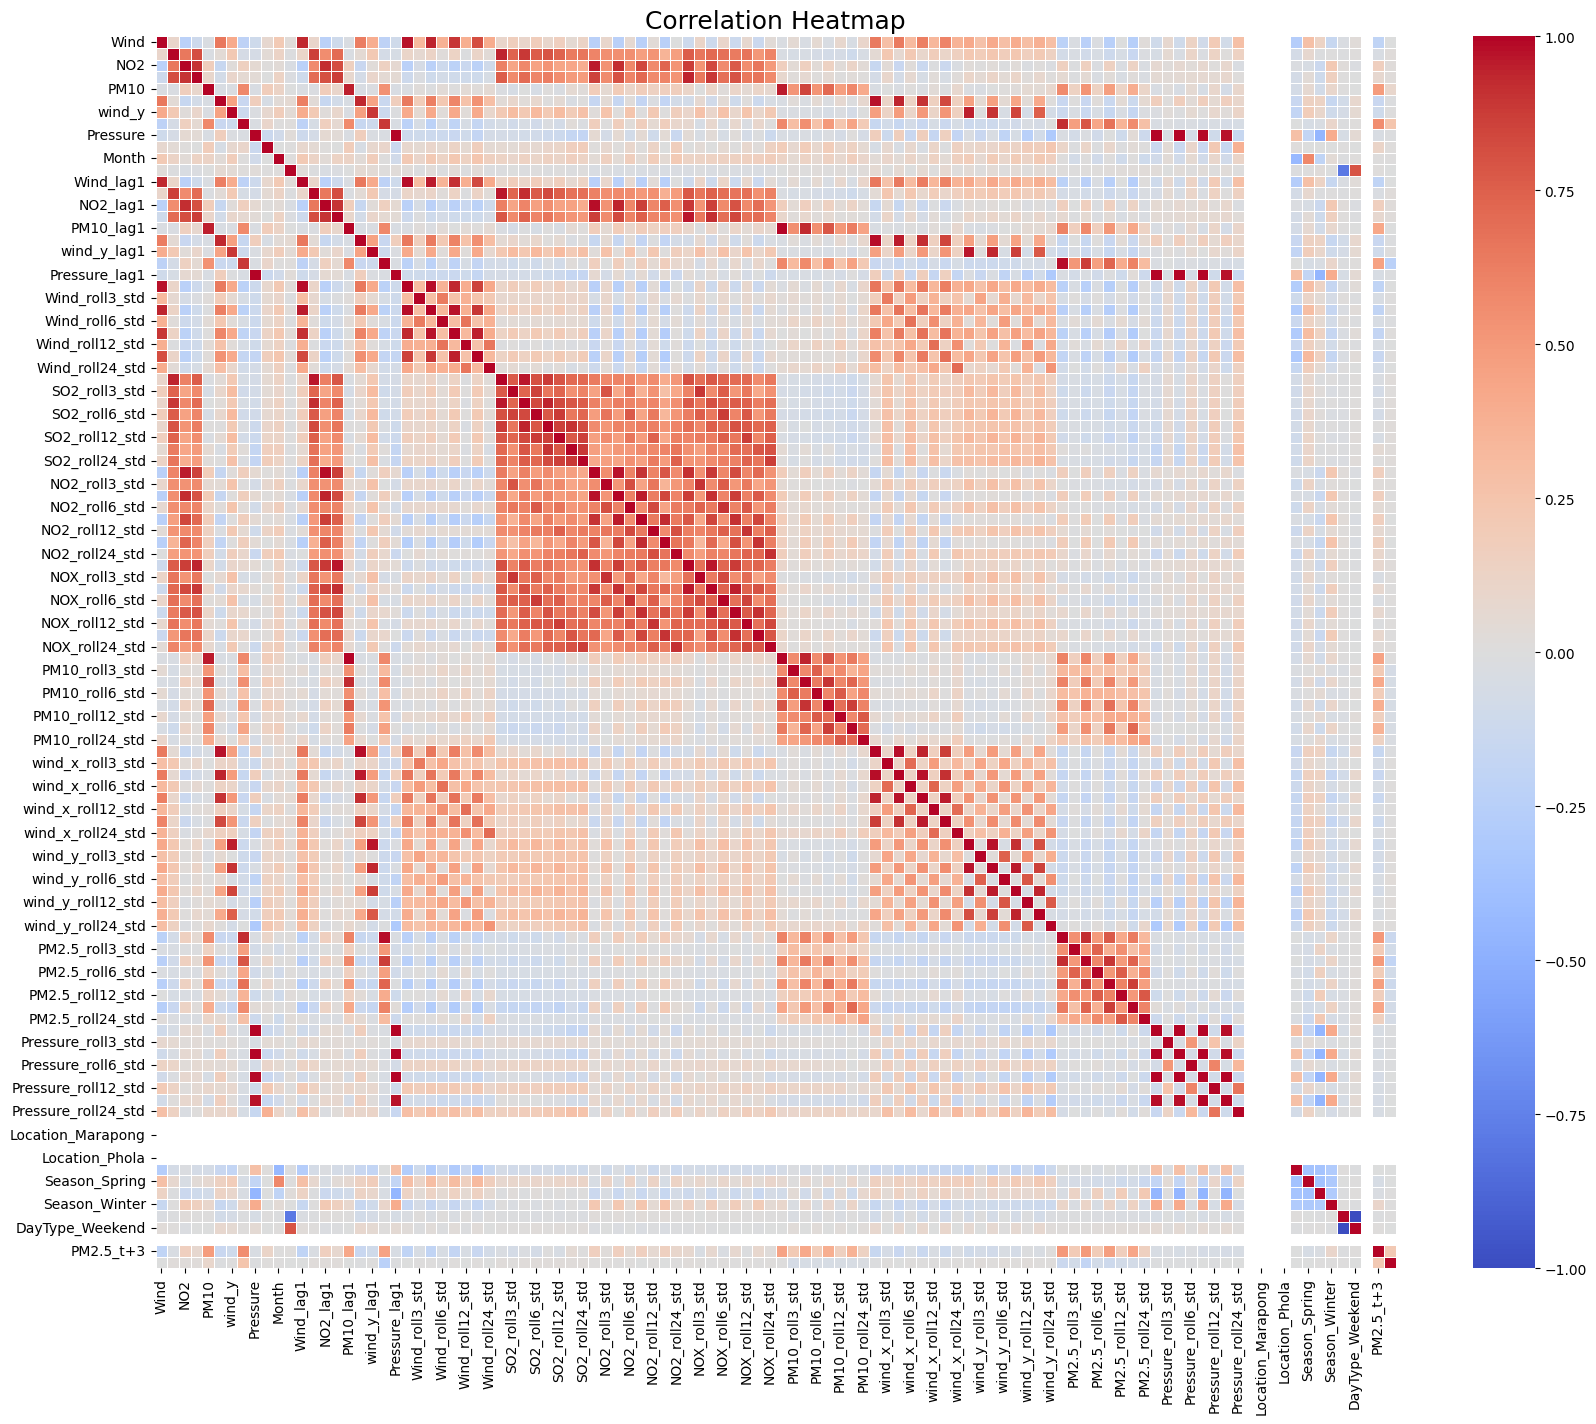

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_for_model.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Generate a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=18)
plt.show()


In [ ]:
# Compute correlations with the target
target = 'PM2.5_t+3'
correlations = data_for_model.corr()[target].drop(target)

# Sort by absolute correlation (strongest relationships first)
feature_ranking = correlations.abs().sort_values(ascending=False)

# Display top 15 features most correlated with PM2.5_t+12
print("Top correlated features with PM2.5_t+3:\n")
print(feature_ranking.head(20))

Top correlated features with PM2.5_t+3:

PM2.5                0.560865
PM10                 0.486927
PM2.5_roll12_mean    0.473704
PM2.5_lag1           0.460397
PM2.5_roll24_mean    0.435350
PM10_roll24_mean     0.363130
PM2.5_diff1          0.216447
PM10_roll3_std       0.207763
Wind                 0.202116
PM2.5_roll3_std      0.199773
PM2.5_roll6_std      0.192667
PM10_roll6_std       0.182201
PM2.5_roll12_std     0.169630
NO2                  0.160989
PM10_roll12_std      0.154851
PM2.5_roll24_std     0.151190
wind_x               0.147751
PM10_roll24_std      0.139125
Hour                 0.115256
wind_y               0.104119
Name: PM2.5_t+3, dtype: float64


In [78]:
feature_ranking

PM2.5                    0.561037
PM2.5_roll3_mean         0.506468
PM2.5_roll6_mean         0.494220
PM10                     0.487065
PM2.5_roll12_mean        0.474010
                           ...   
Location_Chicken Farm         NaN
Location_Marapong             NaN
Location_Medupi               NaN
Location_Phola                NaN
Year                          NaN
Name: PM2.5_t+3, Length: 95, dtype: float64

In [79]:
data_for_model

,Wind,Wind Dir,SO2,NO2,NOX,PM10,PM2.5,Pressure,Hour,Month,DayOfWeek,Wind_lag1,Wind Dir_lag1,SO2_lag1,NO2_lag1,NOX_lag1,PM10_lag1,PM2.5_lag1,Pressure_lag1,Wind_roll3_mean,Wind_roll3_std,Wind_roll6_mean,Wind_roll6_std,Wind_roll12_mean,Wind_roll12_std,Wind_roll24_mean,Wind_roll24_std,Wind Dir_roll3_mean,Wind Dir_roll3_std,Wind Dir_roll6_mean,Wind Dir_roll6_std,Wind Dir_roll12_mean,Wind Dir_roll12_std,Wind Dir_roll24_mean,Wind Dir_roll24_std,SO2_roll3_mean,SO2_roll3_std,SO2_roll6_mean,SO2_roll6_std,SO2_roll12_mean,SO2_roll12_std,SO2_roll24_mean,SO2_roll24_std,NO2_roll3_mean,NO2_roll3_std,NO2_roll6_mean,NO2_roll6_std,NO2_roll12_mean,NO2_roll12_std,NO2_roll24_mean,NO2_roll24_std,NOX_roll3_mean,NOX_roll3_std,NOX_roll6_mean,NOX_roll6_std,NOX_roll12_mean,NOX_roll12_std,NOX_roll24_mean,NOX_roll24_std,PM10_roll3_mean,PM10_roll3_std,PM10_roll6_mean,PM10_roll6_std,PM10_roll12_mean,PM10_roll12_std,PM10_roll24_mean,PM10_roll24_std,PM2.5_roll3_mean,PM2.5_roll3_std,PM2.5_roll6_mean,PM2.5_roll6_std,PM2.5_roll12_mean,PM2.5_roll12_std,PM2.5_roll24_mean,PM2.5_roll24_std,Pressure_roll3_mean,Pressure_roll3_std,Pressure_roll6_mean,Pressure_roll6_std,Pressure_roll12_mean,Pressure_roll12_std,Pressure_roll24_mean,Pressure_roll24_std,Location_Chicken Farm,Location_Marapong,Location_Medupi,Location_Phola,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayType_Weekday,DayType_Weekend,Year,PM2.5_t+3,PM2.5_diff1
0,0.958277,31.26470,5.833,2.129,1.733,18.580,7.715,916.0,0,1,6,0.856357,33.80975,8.090,2.333,2.039,15.320,7.511,916.0,0.907317,0.072068,0.907317,0.072068,0.907317,0.072068,0.907317,0.072068,32.537225,1.799622,32.537225,1.799622,32.537225,1.799622,32.537225,1.799622,6.961500,1.595940,6.961500,1.595940,6.961500,1.595940,6.961500,1.595940,2.231000,0.144250,2.231000,0.144250,2.231000,0.144250,2.231000,0.144250,1.886000,0.216375,1.886000,0.216375,1.886000,0.216375,1.886000,0.216375,16.950000,2.305168,16.950000,2.305168,16.950000,2.305168,16.950000,2.305168,7.613000,0.144250,7.613000,0.144250,7.613000,0.144250,7.613000,0.144250,916.0,0.0,916.0,0.0,916.000000,0.000000,916.000000,0.000000,False,False,True,False,False,False,True,False,False,True,2017,19.650,0.204
1,0.966117,27.51416,6.037,2.299,2.005,23.160,11.310,916.0,0,1,6,0.958277,31.26470,5.833,2.129,1.733,18.580,7.715,916.0,0.926917,0.061232,0.926917,0.061232,0.926917,0.061232,0.926917,0.061232,30.862870,3.166972,30.862870,3.166972,30.862870,3.166972,30.862870,3.166972,6.653333,1.248364,6.653333,1.248364,6.653333,1.248364,6.653333,1.248364,2.253667,0.109295,2.253667,0.109295,2.253667,0.109295,2.253667,0.109295,1.925667,0.167718,1.925667,0.167718,1.925667,0.167718,1.925667,0.167718,19.020000,3.938477,19.020000,3.938477,19.020000,3.938477,19.020000,3.938477,8.845333,2.136900,8.845333,2.136900,8.845333,2.136900,8.845333,2.136900,916.0,0.0,916.0,0.0,916.000000,0.000000,916.000000,0.000000,False,False,True,False,False,False,True,False,False,True,2017,16.370,3.595
2,1.143823,25.13739,3.432,2.220,1.858,22.930,15.700,916.0,0,1,6,0.966117,27.51416,6.037,2.299,2.005,23.160,11.310,916.0,1.022739,0.104935,0.981143,0.119422,0.981143,0.119422,0.981143,0.119422,27.972083,3.089215,29.431500,3.857688,29.431500,3.857688,29.431500,3.857688,5.100667,1.448703,5.848000,1.906093,5.848000,1.906093,5.848000,1.906093,2.216000,0.085071,2.245250,0.090813,2.245250,0.090813,2.245250,0.090813,1.865333,0.136148,1.908750,0.141059,1.908750,0.141059,1.908750,0.141059,21.556667,2.580433,19.997500,3.763388,19.997500,3.763388,19.997500,3.763388,11.575000,3.999091,10.559000,3.845886,10.559000,3.845886,10.559000,3.845886,916.0,0.0,916.0,0.0,916.000000,0.000000,916.000000,0.000000,False,False,True,False,False,False,True,False,False,True,2017,8.020,4.390
3,0.947987,25.35892,1.427,2.050,1.824,20.860,19.650,916.0,0,1,6,1.143823,25.13739,3.432,2.220,1.858,22.930,15.700,916.0,1.019309,0.108213,0.974512,0.104480,0.974512,0.104480,0.974512,0.104480,26.003490,1.312959,28.616984,3.805062,28.616984,3.805062,28.616984,3.805062,3.632000,2.311498,4

## Feature Selection

In [ ]:
features = feature_ranking.head(20).index.tolist()

In [17]:
X = pd.concat([df_train[features], df_test[features]])#data_for_model[features]
y = pd.concat([df_train['PM2.5_t+3'], df_test['PM2.5_t+3']])#data_for_model['PM2.5_t+3']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [16]:
y

0        51.610
1        48.710
2        43.650
3        35.660
4        30.970
          ...  
89540     5.771
89541     8.420
89542    11.070
89543    11.190
89544     7.019
Name: PM2.5_t+3, Length: 89545, dtype: float64

## Data splitting for models

In [18]:
# Let's use 80% of the data for training, 20% for testing
split_idx = int(len(X_scaled) * 0.8)

X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


## LSTM Model (Neural Network)

In [19]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 173.3601 - val_loss: 181.6171
Epoch 2/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 120.2101 - val_loss: 186.5299
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 107.4446 - val_loss: 177.6476
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 120.4683 - val_loss: 175.9867
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 111.0271 - val_loss: 184.5771
Epoch 6/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 95.8455 - val_loss: 182.5473
Epoch 7/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 98.4605 - val_loss: 176.9094
Epoch 8/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 110.4642 - val_loss: 173.1676
Epoch 9/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 102.8163 - val_loss: 174.5315
Epoch 10/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 108.2691 - val_loss: 179.8369
Epoch 11/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 116.4434 - val_los

In [20]:
#Prediction accuracy
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R²: 0.4678876980139576
RMSE: 13.13392316842625


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [85]:
#Validation data prediction
X_val = df_val[features]
y_val = df_val['PM2.5_t+3']

X_val_scaled = scaler.fit_transform(X_val)


y_pred_val = model.predict(X_val_scaled)

r2 = r2_score(y_val, y_pred_val)
rmse = mean_squared_error(y_val, y_pred_val, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

ValueError: Found array with 0 sample(s) (shape=(0, 20)) while a minimum of 1 is required by StandardScaler.

In [21]:
last_known_data = data_for_model.iloc[-1][features].values.reshape(1, -1)
last_known_data_scaled = scaler.transform(last_known_data)

forecast_3hr = model.predict(last_known_data_scaled)[0][0]
print(f"Forecasted PM2.5 (3 hrs ahead): {forecast_3hr}")


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Forecasted PM2.5 (3 hrs ahead): 8.916860580444336


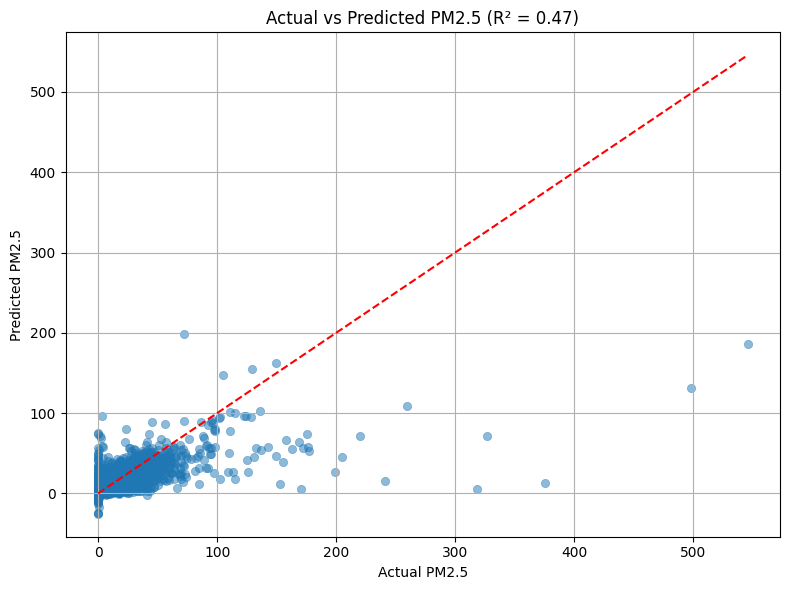

In [22]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title(f'Actual vs Predicted PM2.5 (R² = {r2_score(y_test, y_pred):.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
y_val

89545      6.033
89546      7.967
89547     12.030
89548     12.600
89549     13.200
           ...  
103855    23.430
103856    29.240
103857    31.590
103858    27.970
103859    24.740
Name: PM2.5_t+3, Length: 14315, dtype: float64

# Testing out XGBoost Regressor and Random Forrest Regressor

In [23]:
X = pd.concat([df_train[features], df_test[features]])#data_for_model[features]
y = pd.concat([df_train['PM2.5_t+3'], df_test['PM2.5_t+3']])#data_for_model['PM2.5_t+3']

In [24]:
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
#Random Forrest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [26]:
#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)


## Model Evaluation

In [27]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



Random Forest Performance:
MAE: 4.95809074256293
RMSE: 10.44084495485919
R2 Score: 0.4539398020349257

XGBoost Performance:
MAE: 5.0231096280479965
RMSE: 10.306409822366376
R2 Score: 0.4679112896038329


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'Random Forest: Actual vs Predicted')

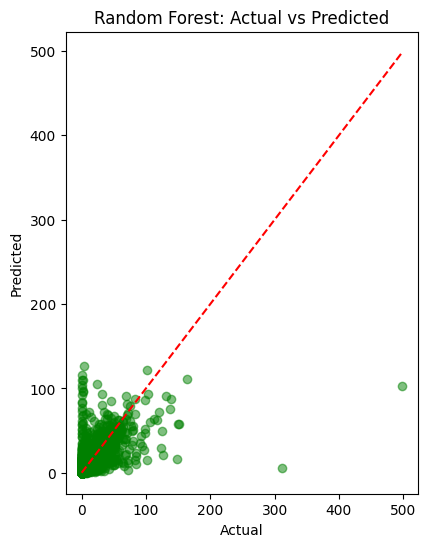

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")

Text(0.5, 1.0, 'XGBoost: Actual vs Predicted')

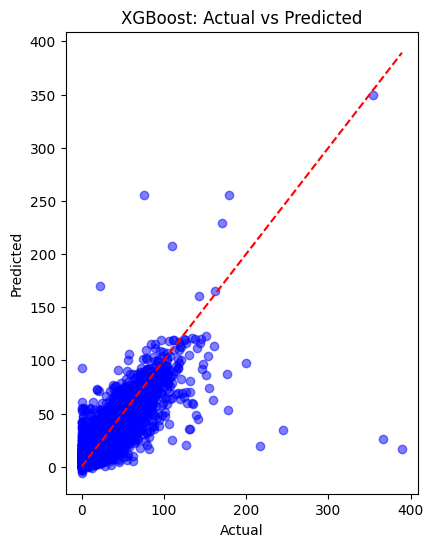

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_preds, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted")

In [ ]:
#Validation performance

rf_val = rf.predict(X_val)

xgb_val = xgb.predict(X_val)

evaluate_model("Random Forrest", y_val, rf_val)
evaluate_model("XGBoost", y_val, xgb_val )


Random Forrest Performance:
MAE: 6.5796065525672365
RMSE: 11.392128570626655
R2 Score: 0.6363194480431638

XGBoost Performance:
MAE: 6.431195657281051
RMSE: 11.443756556320992
R2 Score: 0.6330156510562247


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'Random Forest Validation: Actual vs Predicted')

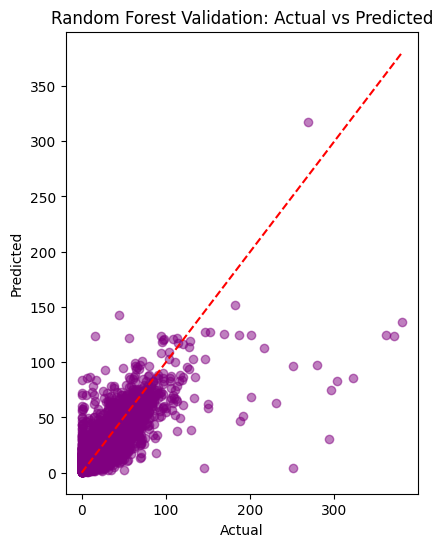

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.scatter(y_val, rf_val, alpha=0.5, color='purple')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Validation: Actual vs Predicted")

Text(0.5, 1.0, 'XGBoost Validation: Actual vs Predicted')

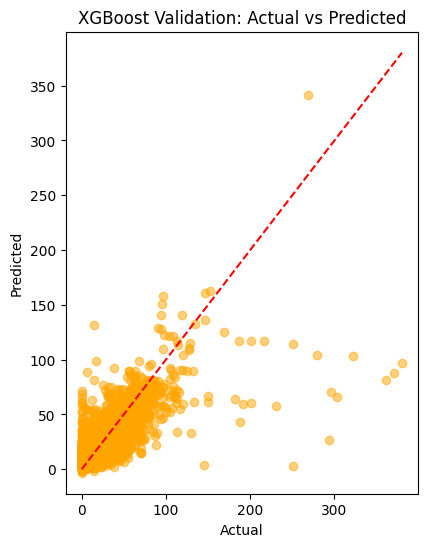

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.scatter(y_val, xgb_val, alpha=0.5, color='orange')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Validation: Actual vs Predicted")

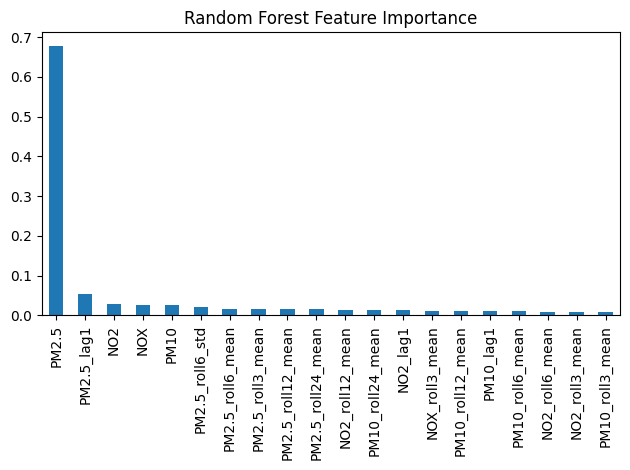

In [ ]:
import matplotlib.pyplot as plt

# For Random Forest
rf_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
rf_importance.plot(kind='bar', title='Random Forest Feature Importance')
plt.tight_layout()
plt.show()




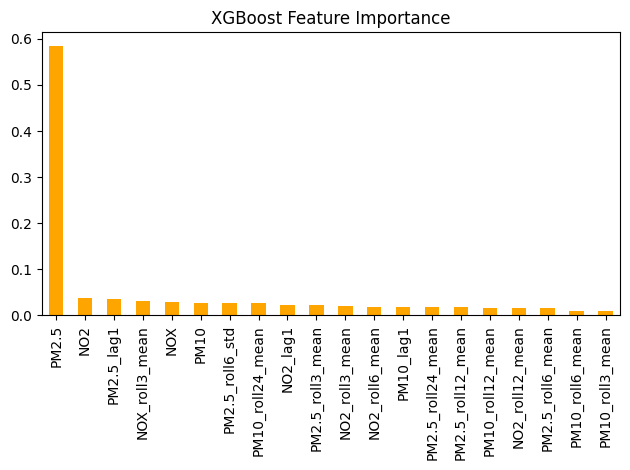

In [ ]:
# For XGBoost
xgb_importance = pd.Series(xgb.feature_importances_, index=features).sort_values(ascending=False)
xgb_importance.plot(kind='bar', title='XGBoost Feature Importance', color='orange')
plt.tight_layout()
plt.show()